<a href="https://colab.research.google.com/github/heizsen/Ai/blob/main/Azis_PCA(Principal_Component_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA stands for Principal Component Analysis. It's a popular technique used for dimensionality reduction in data analysis and machine learning. The primary goal of PCA is to reduce the dimensionality of a dataset while preserving as much variance as possible.

Here's a breakdown of how PCA works:

1. **Data Standardization**: Before applying PCA, it's essential to standardize the data to have a mean of 0 and a standard deviation of 1. This step ensures that all variables contribute equally to the analysis.

2. **Covariance Matrix Computation**: PCA computes the covariance matrix of the standardized data. The covariance matrix represents the relationships between pairs of variables in the dataset.

3. **Eigenvalue Decomposition**: PCA then decomposes the covariance matrix into its eigenvectors and eigenvalues. Eigenvectors represent the directions of maximum variance in the data, while eigenvalues represent the magnitude of variance along these directions.

4. **Selection of Principal Components**: PCA sorts the eigenvectors based on their corresponding eigenvalues in descending order. These eigenvectors are called principal components. The number of principal components chosen is typically determined by the desired level of variance retained in the reduced-dimensional space.

5. **Projection**: Finally, PCA projects the original data onto the subspace spanned by the selected principal components. This projection transforms the data into a lower-dimensional space while preserving the maximum variance.

PCA is widely used for various purposes, including data visualization, noise reduction, feature extraction, and data compression. It's particularly beneficial in scenarios with high-dimensional data, such as image processing, genetics, finance, and text analysis, where reducing the dimensionality can lead to simpler and more efficient models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/DianCA26/Dataset/main/CarPrice_Assignment.csv")

In [ ]:
df.select_dtypes(include=np.number).columns.tolist()

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
X = df[['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']]
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_sc)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

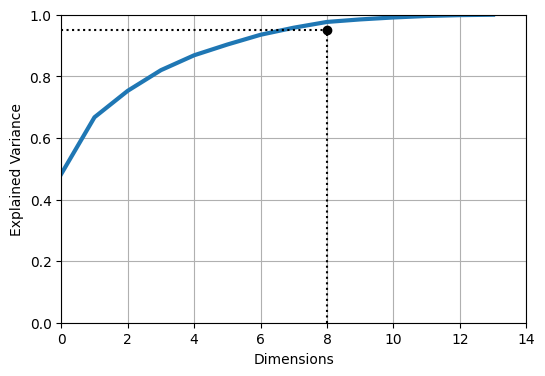

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA

Kpca=KernelPCA(n_components=4)
Kpca.fit(X_train_sc)

KernelPCA(n_components=4)

In [ ]:
pca = PCA(n_components=4)
pca.fit(X_train_sc)
X_reduced = pca.transform(X_train_sc)
X_reduced_test = pca.transform(X_test_sc)

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel="poly", degree=3,C=1000,epsilon=0.01)
model.fit(X_reduced, y_train)
y_train_pred = model.predict(X_reduced)
y_test_pred = model.predict(X_reduced_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))


MAE train =  2963.858414581467
MAE test =  2922.098628054763
MSE train =  25315751.66111914
MSE test =  24458818.508527495
RMSE train =  5031.476091677187
RMSE test =  4945.585759900186
r2score train =  0.6261687705401148
r2score test =  0.4595685743385691


# **Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([("scale", StandardScaler()),
                 ("pca",PCA(n_components=4)),
                 ("svr", SVR(kernel='poly',degree=3,C=1000,epsilon=0.01))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=4)),
                ('svr', SVR(C=1000, epsilon=0.01, kernel='poly'))])

In [ ]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))


MAE train =  2963.85841458147
MAE test =  2922.0986280547663
MSE train =  25315751.661119096
MSE test =  24458818.508527484
RMSE train =  5031.476091677183
RMSE test =  4945.585759900185
r2score train =  0.6261687705401155
r2score test =  0.45956857433856946


# **GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['poly'],
               'degree': [2,3,4,5,6,7,8],
               'epsilon': [0.01, 0.02, 0.05, 1, 10, 100, 1000],
               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [ ]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring="r2")
grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'kernel': 'linear'}
Best cross-validation score: 0.62


In [ ]:
y_train_pred=grid_search.best_estimator_.predict(X_reduced)
y_test_pred=grid_search.best_estimator_.predict(X_reduced_test)

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))

MAE train =  2800.7847660437337
MAE test =  2722.011648744014
MSE train =  21885906.367292963
MSE test =  12821662.261170948
RMSE train =  4678.237527883013
RMSE test =  3580.7348772522864
r2score train =  0.6768164187005076
r2score test =  0.716698122080667


# **Gridsearch_pipe**

In [ ]:
pipe = Pipeline([("scale", StandardScaler()),
                 ("pca",PCA()),
                 ("clf", SVR(kernel='poly',degree=3,C=1000,epsilon=0.01))])

In [ ]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['poly'],
               'degree': [2,3,4,5,6,7,8],
               'epsilon': [0.01, 0.02, 0.05, 1, 10, 100, 1000],
               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [ ]:
param_grid2 = [{'pca__n_components':[2,3,4,5,6,7]}]

In [ ]:
grid_search_pipe = GridSearchCV(pipe, param_grid=param_grid2, cv=5, scoring="r2")
grid_search_pipe.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA()),
                                       ('clf',
                                        SVR(C=1000, epsilon=0.01,
                                            kernel='poly'))]),
             param_grid=[{'pca__n_components': [2, 3, 4, 5, 6, 7]}],
             scoring='r2')

In [ ]:
print("Best parameters: {}".format(grid_search_pipe.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_pipe.best_score_))

Best parameters: {'pca__n_components': 2}
Best cross-validation score: 0.47


In [ ]:
new=grid_search_pipe.best_estimator_

In [ ]:
new.predict(X_train)

array([ 10239.32536518,  11546.14194387,  12838.41305213,  17488.16591105,
        11210.09623767,  11359.03325308,   8104.13365443,  11207.47112809,
        11282.34792932,  12629.81748846,  14582.23137801,  35549.97850745,
        11214.2842947 ,   1094.18183533,   4755.78983363,  10774.01851892,
        11682.52163012,  11503.55304191,  11320.4184714 ,  11150.76040811,
         9609.70665284,  11032.78954106,  11324.06471042,  10743.88548234,
       -20611.65541897,   5383.40918458,   7274.05921572,  12891.36901929,
        11419.55729383,  13411.39653373,  18148.94110416,  11175.27436327,
        12771.33956937,  13348.73428074,  14062.89026036,  11249.01316831,
        14328.46881727,  18751.16694076,  14442.62038478,  26180.16381789,
        10696.67002003,  10391.12369676,  12483.52145165,  11313.16492526,
         9889.69320051,   9721.05471246,   5355.25618839,  64762.72746991,
         9626.16038352,   9581.28910978,  12001.86121477,  18096.56832894,
         5265.0306075 ,  

In [ ]:
y_train_pred=grid_search_pipe.best_estimator_.predict(X_train)
y_test_pred=grid_search_pipe.best_estimator_.predict(X_test)

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))

MAE train =  3550.161488157546
MAE test =  3332.0737064860473
MSE train =  31227044.827429976
MSE test =  21241373.068044383
RMSE train =  5588.116393511321
RMSE test =  4608.836411508265
r2score train =  0.5388782163570554
r2score test =  0.530659850713261
